# Lista 4 - Exercício 1

Este problema é dividido em cinco etapas, listadas a seguir:

**I.** Gere um conjunto de dados bidimensionais $X_1$ (treinamento) conforme segue. Selecione 150 pontos em um espaço bidimensional na região definida por $[-5, 5] \times [-5, 5]$, seguindo uma distribuição uniforme (com _seed_ igual a zero). Rotule o ponto $x = [x(1), x(2)]^T$ com a classe $+1$ se $0.05(x^3(1) + x^2(1) + 1) > x(2)$, e com a classe $-1$ caso contrário. Plote os dados de treinamento e gere um conjunto adicional $X_2$ (teste) usando a mesma descrição de $X_1$ (com _seed_ igual a 100).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

N = 150
dim = 2

train_rnd_gen = np.random.default_rng(0)
test_rnd_gen = np.random.default_rng(100)

train = np.array([train_rnd_gen.uniform(-5, 5, N) for i in range(dim)]).T
test  = np.array([test_rnd_gen.uniform(-5, 5, N) for i in range(dim)]).T

y_train = [1 if 0.05 * (x[0] ** 3 + x[0] ** 2 + 1) > (x[1]) else -1 for x in train]
y_test  = [1 if 0.05 * (x[0] ** 3 + x[0] ** 2 + 1) > (x[1]) else -1 for x in test]

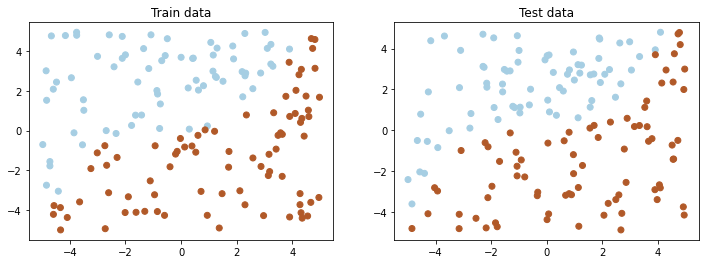

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(train[:, 0], train[:, 1], c=y_train, cmap=plt.cm.Paired)
axs[0].set_title('Train data')

axs[1].scatter(test[:, 0], test[:, 1], c=y_test, cmap=plt.cm.Paired)
axs[1].set_title('Test data')

plt.show(fig)

**II.** Construa um classificador SVM linear com os parâmetros $C = 2$ e $\text{tol} = 0.001$. Calcule o erro de classificação de treinamento, de teste e o número de vetores suporte em cada caso. Plote as regiões de decisão definidas pelo classificador e as margens corespondentes.

In [3]:
def svm_plot(clf, X, C, labels, title, ax=None):
    
    if ax is None:
        ax = plt.gca()
    
    # plot data
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap=plt.cm.Paired)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    # indices here represents only the actual support vectors (the ones that lie on the margin)
    indices = np.where(np.abs(clf.dual_coef_.flatten()) < C)[0]
    ax.scatter(clf.support_vectors_[indices, 0], clf.support_vectors_[indices, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    ax.set_title(title)
    
    return ax

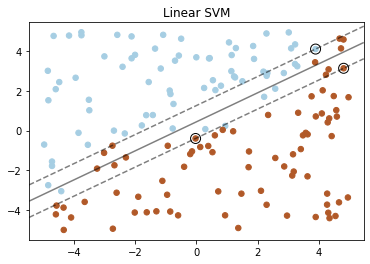

In [4]:
C = 2
clf = SVC(kernel='linear', C=C, tol=0.001).fit(train, y_train)
svm_plot(clf, train, C, y_train, "Linear SVM");

In [5]:
print("Erro de classificação: Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf.score(train, y_train), 1 - clf.score(test, y_test)))
print("{} vetores de suporte".format(np.where(np.abs(clf.dual_coef_.flatten()) < C)[0].shape[0]))

Erro de classificação: Treino - 0.0800%	Teste - 0.0933%
3 vetores de suporte


**III.** Construa um classificador SVM não-linear (RBF kernel) com os parâmetros $C = 2$, $\text{tol} = 0.001$ e $\sigma = 0.1$ e $2$ . Calcule  o erro de classificação de treinamento, de teste e o número de vetores suporte em casa caso. Plote as regiões de decisão definidas pelo classificador.

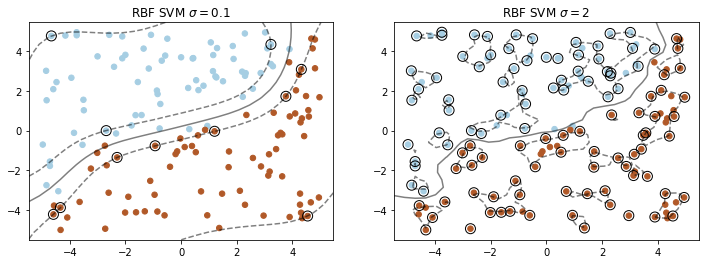

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

C, tol, sigma = 2, 0.001, 0.1
clf1 = SVC(kernel='rbf', C=C, tol=tol, gamma=sigma).fit(train, y_train)
svm_plot(clf1, train, C, y_train, "RBF SVM $\sigma = 0.1$", ax=axs[0])

C, tol, sigma = 2, 0.001, 2
clf2 = SVC(kernel='rbf', C=C, tol=tol, gamma=sigma).fit(train, y_train)
svm_plot(clf2, train, C, y_train, "RBF SVM $\sigma = 2$", ax=axs[1]);

In [7]:
print("Erro de classificação sigma = 0.1: Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf1.score(train, y_train), 1 - clf1.score(test, y_test)))
print("{} vetores de suporte".format(np.where(np.abs(clf1.dual_coef_.flatten()) < C)[0].shape[0]))
print()
print("Erro de classificação sigma = 2: Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf2.score(train, y_train), 1 - clf2.score(test, y_test)))
print("{} vetores de suporte".format(np.where(np.abs(clf2.dual_coef_.flatten()) < C)[0].shape[0]))

Erro de classificação sigma = 0.1: Treino - 0.0267%	Teste - 0.0400%
11 vetores de suporte

Erro de classificação sigma = 2: Treino - 0.0067%	Teste - 0.0267%
111 vetores de suporte


**IV.** Construa um classificador SVM não-linear com kernel RBF e os parâmetros $\sigma = 1.5$ e com kernel polinomial e os parâmetros $n = 3$ e $\beta = 1$. Em ambos os casos, use $\text{tol} = 0.001$ e $C = 0.2, 20, 200$. Compare e comente os resultados.

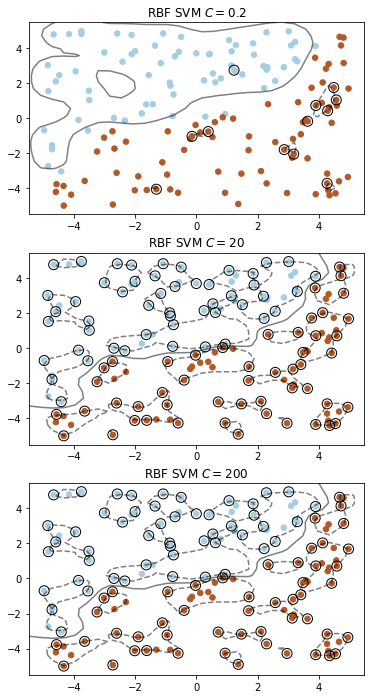

In [8]:
# rbf kernel
fig, axs = plt.subplots(nrows=3, figsize=(6, 12))

C, tol, sigma = 0.2, 0.001, 1.5
clf1 = SVC(kernel='rbf', C=C, tol=tol, gamma=sigma).fit(train, y_train)
svm_plot(clf1, train, C, y_train, "RBF SVM $C = {}$".format(C), ax=axs[0])

C, tol, sigma = 20, 0.001, 1.5
clf2 = SVC(kernel='rbf', C=C, tol=tol, gamma=sigma).fit(train, y_train)
svm_plot(clf2, train, C, y_train, "RBF SVM $C = {}$".format(C), ax=axs[1])

C, tol, sigma = 200, 0.001, 1.5
clf3 = SVC(kernel='rbf', C=C, tol=tol, gamma=sigma).fit(train, y_train)
svm_plot(clf3, train, C, y_train, "RBF SVM $C = {}$".format(C), ax=axs[2]);

In [9]:
print("Erro de classificação C = 0.2: Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf1.score(train, y_train), 1 - clf1.score(test, y_test)))
print("Erro de classificação C = 20:  Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf2.score(train, y_train), 1 - clf2.score(test, y_test)))
print("Erro de classificação C = 200: Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf3.score(train, y_train), 1 - clf3.score(test, y_test)))

Erro de classificação C = 0.2: Treino - 0.0400%	Teste - 0.0933%
Erro de classificação C = 20:  Treino - 0.0000%	Teste - 0.0333%
Erro de classificação C = 200: Treino - 0.0000%	Teste - 0.0333%


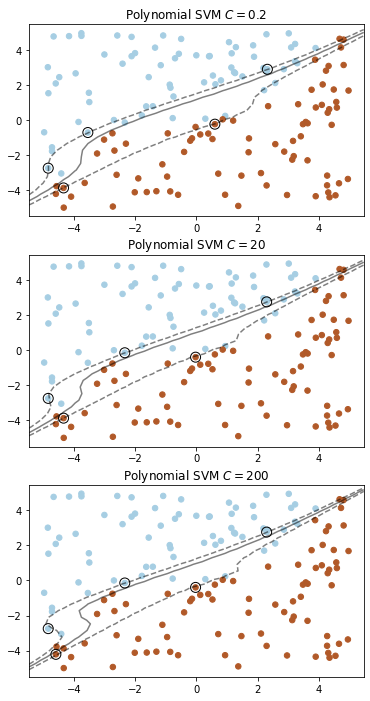

In [10]:
# polynomial kernel
fig, axs = plt.subplots(nrows=3, figsize=(6, 12))

C, tol, beta, n = 0.2, 0.001, 1, 3
clf1 = SVC(kernel='poly', C=C, tol=tol, degree=n, gamma=beta).fit(train, y_train)
svm_plot(clf1, train, C, y_train, "Polynomial SVM $C = {}$".format(C), ax=axs[0])

C, tol, beta, n = 20, 0.001, 1, 3
clf2 = SVC(kernel='poly', C=C, tol=tol, degree=n, gamma=beta).fit(train, y_train)
svm_plot(clf2, train, C, y_train, "Polynomial SVM $C = {}$".format(C), ax=axs[1])

C, tol, beta, n = 200, 0.001, 1, 3
clf3 = SVC(kernel='poly', C=C, tol=tol, degree=n, gamma=beta).fit(train, y_train)
svm_plot(clf3, train, C, y_train, "Polynomial SVM $C = {}$".format(C), ax=axs[2]);

In [11]:
print("Erro de classificação C = 0.2: Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf1.score(train, y_train), 1 - clf1.score(test, y_test)))
print("Erro de classificação C = 20:  Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf2.score(train, y_train), 1 - clf2.score(test, y_test)))
print("Erro de classificação C = 200: Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf3.score(train, y_train), 1 - clf3.score(test, y_test)))

Erro de classificação C = 0.2: Treino - 0.0600%	Teste - 0.0733%
Erro de classificação C = 20:  Treino - 0.0667%	Teste - 0.0867%
Erro de classificação C = 200: Treino - 0.0600%	Teste - 0.0800%


Embora os resultados de classificação sejam similares, podemos observar um _overfitting_ intenso com o kernel RBF, enquanto o kernel polinomial foi capaz de produzir uma superfície de separação muito mais suave, robusta e com melhor capacidade de generalização.